In [1]:
%matplotlib inline

import skimage.io
import skimage.exposure
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
debug = True

In [3]:
plate = '20585'
well = 'E12'
site = '7'

In [4]:
load_pattern = lambda channel : '/home/jr0th/github/segmentation/data/BBBC022_all_channels/unzip/BBBC022_v1_images_' + plate + 'w' + str(channel) + '/IXMtest_' + well + '_s' + site + '*'

In [5]:
def normalize(img):

    # normalize to [0,1]
    percentile = 99
    high = np.percentile(img, percentile)
    low = np.percentile(img, 100-percentile)

    img = np.minimum(high, img)
    img = np.maximum(low, img)

    img = (img - low) / (high - low) # gives float64, thus cast to 8 bit later
    
    img = skimage.img_as_ubyte(img)
    return img

In [6]:
# load images
ch1 = skimage.io.imread_collection(load_pattern(1)).concatenate()
ch2 = skimage.io.imread_collection(load_pattern(2)).concatenate()
ch3 = skimage.io.imread_collection(load_pattern(3)).concatenate()
ch4 = skimage.io.imread_collection(load_pattern(4)).concatenate()
ch5 = skimage.io.imread_collection(load_pattern(5)).concatenate()

# ensure that we have found one image per channel
if((len(ch1) != 1) or (len(ch2) != 1) or (len(ch3) != 1) or (len(ch4) != 1) or (len(ch5) != 1)):
    print("ERROR: Not exactly one image matches the load pattern. Check variables.")

# squeeze images
ch1 = ch1.squeeze()
ch2 = ch2.squeeze()
ch3 = ch3.squeeze()
ch4 = ch4.squeeze()
ch5 = ch5.squeeze()

# crop images
mindim1 = np.rint(ch1.shape[0] * .1).astype(np.int)
maxdim1 = np.rint(ch1.shape[0] * .9).astype(np.int)

mindim2 = np.round(ch1.shape[1] * .1).astype(np.int)
maxdim2 = np.round(ch1.shape[1] * .9).astype(np.int)

ch1 = ch1[mindim1:maxdim1, mindim2:maxdim2]
ch2 = ch2[mindim1:maxdim1, mindim2:maxdim2]
ch3 = ch3[mindim1:maxdim1, mindim2:maxdim2]
ch4 = ch4[mindim1:maxdim1, mindim2:maxdim2]
ch5 = ch5[mindim1:maxdim1, mindim2:maxdim2]
    
# normalize images
ch1 = normalize(ch1)
ch2 = normalize(ch2)
ch3 = normalize(ch3)
ch4 = normalize(ch4)
ch5 = normalize(ch5)

/usr/local/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


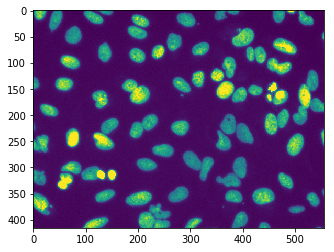

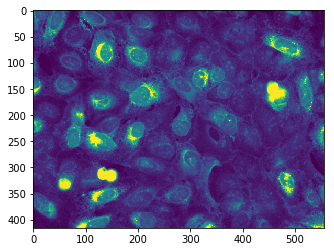

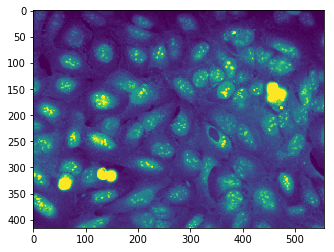

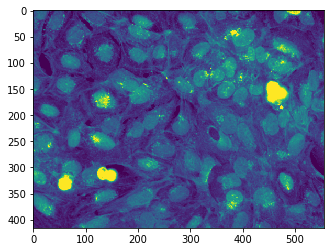

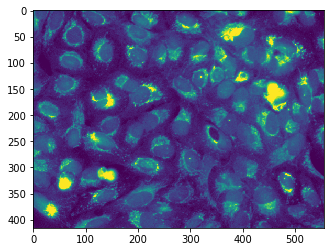

In [7]:
# get color assignment right
if(debug):
    plt.imshow(ch1)
    plt.show()
    plt.imshow(ch2)
    plt.show()
    plt.imshow(ch3)
    plt.show()
    plt.imshow(ch4)
    plt.show()
    plt.imshow(ch5)
    plt.show()

# 1 = hoechst = blue
# 2 = er (Con A) = green
# 3 = syto = yellow
# 4 = ph_golgi = orange
# 5 = mito = red

col1 = np.array([0, 0, 255], dtype=np.uint8)
col2 = np.array([0, 255, 0], dtype=np.uint8)
col3 = np.array([255, 255, 0], dtype=np.uint8)
col4 = np.array([255, 150, 0], dtype=np.uint8)
col5 = np.array([255, 0, 0], dtype=np.uint8)

In [8]:
def colorize_image(img, col):
    
    # rescale image
    img_float = img.astype(np.float)
    img_float = img_float / 255

    # colorize
    img_col_float = np.reshape(img_float, img_float.shape + (1,)) * col
    img_col_byte = img_col_float.astype(np.uint8)

    return img_col_byte

In [9]:
# colorize images
ch1_col = colorize_image(ch1, col1)
ch2_col = colorize_image(ch2, col2)
ch3_col = colorize_image(ch3, col3)
ch4_col = colorize_image(ch4, col4)
ch5_col = colorize_image(ch5, col5)

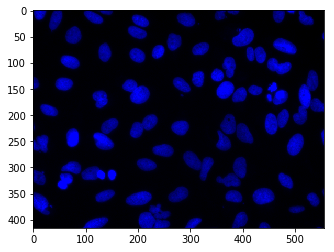

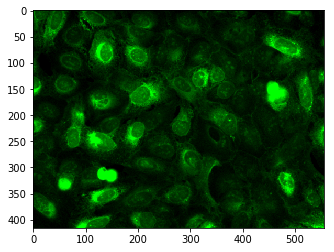

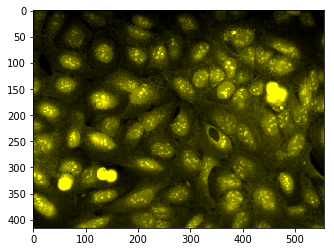

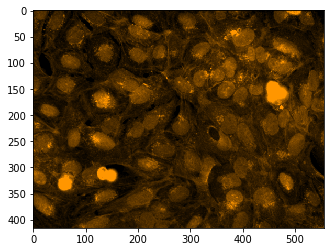

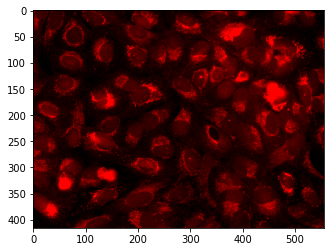

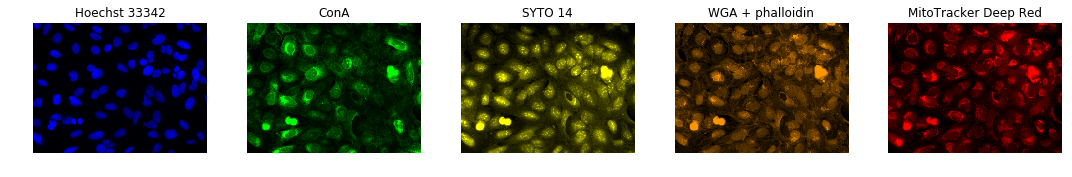

In [10]:
# plot the images
plt.imshow(ch1_col)
plt.show()
plt.imshow(ch2_col)
plt.show()
plt.imshow(ch3_col)
plt.show()
plt.imshow(ch4_col)
plt.show()
plt.imshow(ch5_col)
plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(15,5))

ax[0].imshow(ch1_col)
ax[1].imshow(ch2_col)
ax[2].imshow(ch3_col)
ax[3].imshow(ch4_col)
ax[4].imshow(ch5_col)

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')

ax[0].set_title('Hoechst 33342')
ax[1].set_title('ConA')
ax[2].set_title('SYTO 14')
ax[3].set_title('WGA + phalloidin')
ax[4].set_title('MitoTracker Deep Red')

plt.tight_layout()
plt.savefig('./art_channels_' + plate + '_' + well + '_' + site + '.png')
plt.show()

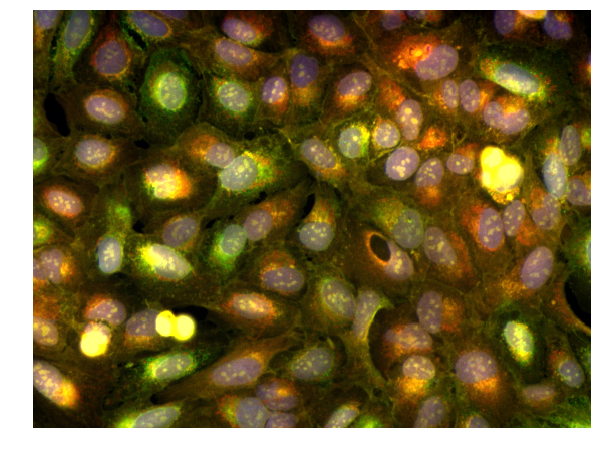

In [11]:
# combine final image

# combination parameteres
fac1 = 2
fac2 = 2
fac3 = 2
fac4 = 2
fac5 = 2

mix = normalize(
    fac1 * ch1_col.astype(np.uint16) +
    fac2 * ch2_col.astype(np.uint16) + 
    fac3 * ch3_col.astype(np.uint16) + 
    fac4 * ch4_col.astype(np.uint16) + 
    fac5 * ch5_col.astype(np.uint16)
)

plt.figure(figsize=(10,10))
plt.imshow(mix)
plt.axis('off')
plt.savefig('./art_' + plate + '_' + well + '_' + site + '.png')
plt.show()